<a href="https://colab.research.google.com/github/vkunal1996/Airport-Reviews-Analysis/blob/master/Airline_Quality_Service.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airline Quality Service Analysis**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install pydrive

    100% |████████████████████████████████| 993kB 17.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link='https://drive.google.com/open?id=1tmzZKQKEvxt61TxjHchFfJkpqklVgdzP'
fluff,id=link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('airline.csv')  
airline_data = pd.read_csv('airline.csv')

In [5]:
airline_data.head(1)

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,NaN,7.0,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1


# **Analysing the DataSet**

In [125]:
round((airline_data.isna().sum())/len(airline_data),2)

airline_name                     0.00
link                             0.00
title                            0.00
author                           0.00
author_country                   0.04
date                             0.00
content                          0.00
aircraft                         0.97
type_traveller                   0.94
cabin_flown                      0.07
route                            0.94
overall_rating                   0.11
seat_comfort_rating              0.19
cabin_staff_rating               0.19
food_beverages_rating            0.20
inflight_entertainment_rating    0.25
ground_service_rating            0.95
wifi_connectivity_rating         0.99
value_money_rating               0.04
recommended                      0.00
dtype: float64

In [0]:
airline_data=airline_data[airline_data['overall_rating'].notnull()]

In [127]:
round((airline_data.isna().sum())/len(airline_data),2)

airline_name                     0.00
link                             0.00
title                            0.00
author                           0.00
author_country                   0.02
date                             0.00
content                          0.00
aircraft                         0.97
type_traveller                   0.94
cabin_flown                      0.05
route                            0.94
overall_rating                   0.00
seat_comfort_rating              0.17
cabin_staff_rating               0.17
food_beverages_rating            0.18
inflight_entertainment_rating    0.23
ground_service_rating            0.94
wifi_connectivity_rating         0.98
value_money_rating               0.03
recommended                      0.00
dtype: float64

# **Calcluating Total Reviews to Each airline**

In [16]:

airline_names=airline_data.airline_name.unique()
print('Total airlines Considered for Analysis : ',len(airline_names))
total_reviews_each_airline=[]
for i in airline_names:
  temp=airline_data[airline_data.airline_name==i]
  total_reviews_each_airline.append(len(temp))
result=list(zip(airline_names,total_reviews_each_airline))
print('Total Reviews Analysed : ',sum(total_reviews_each_airline))

Total airlines Considered for Analysis :  357
Total Reviews Analysed :  36861


In [17]:
df=pd.DataFrame(result,columns=['Airline_Name','Total_Reviews'])
df=df.sort_values(by='Total_Reviews',ascending=False)
df.head()

,Airline_Name,Total_Reviews
295,spirit-airlines,966
97,british-airways,896
333,united-airlines,839
20,air-canada-rouge,715
138,emirates,690


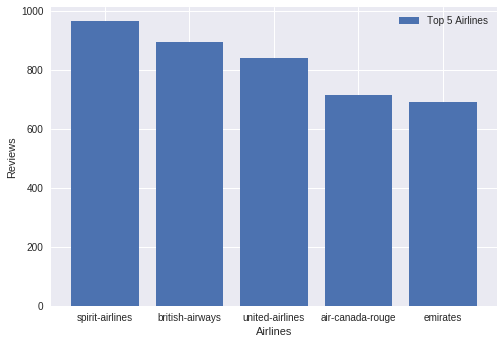

In [180]:
plt.style.use('seaborn')
plt.xlabel('Airlines')
plt.ylabel('Reviews')
plt.bar(df.Airline_Name[:5],df.Total_Reviews[:5],label='Top 5 Airlines')
plt.legend()


# **Finding Polarity of Each Review**

In [0]:
from textblob import TextBlob

In [0]:
result1=[]
num=1
numlist=[]
for review in airline_data.content:
    analysis=TextBlob(review)
    result1.append(analysis.polarity)
    numlist.append(num)
    num=num+1
result1=np.array(result1)


### **Plotting Polarity**

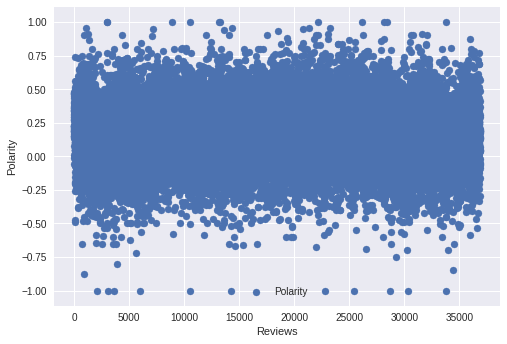

In [181]:
plt.style.use('seaborn')
plt.scatter(numlist,result1,label='Polarity')
plt.xlabel('Reviews')
plt.ylabel('Polarity')
plt.legend()

# **Providing Sentiment Value to Each Review According to Rating**

In [0]:
sentiment=[]
for i in airline_data.overall_rating:
  if(i<=5 and i>=0):
    sentiment.append(0)
  else:
    sentiment.append(1)

In [0]:
new_airline_data=airline_data.copy()

In [0]:
new_airline_data['sentiment']=sentiment

In [0]:
### Shuffline the Dataset for Training ###

from sklearn.utils import shuffle
new_airline_data=shuffle(new_airline_data)

# **Logisitc Regression**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
model=LogisticRegression()
vectorizer=CountVectorizer(ngram_range=(1,2))
x_l=vectorizer.fit_transform(new_airline_data.content.values)

In [152]:
model.fit(x_l[:29488],new_airline_data.sentiment[:29488].values)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [153]:
model.score(x_l[29488:],new_airline_data.sentiment[29488:].values)

0.8794249287942493

In [0]:
y_predict=model.predict(x_l[29488:])

In [0]:
x_axis=[]
n=1
for i in range(0,len(new_airline_data[29488:].values)):
  x_axis.append(n)
  n=n+1

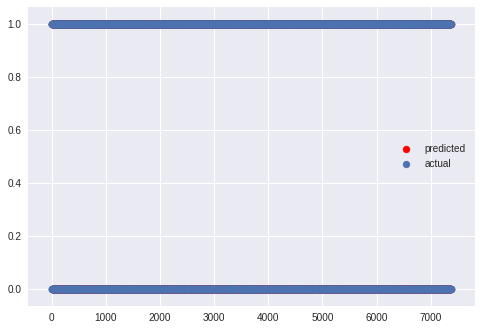

In [182]:
plt.scatter(x_axis,new_ariline_data.sentiment[29488:],color='red',label='predicted')
plt.scatter(x_axis,y_predict,label='actual')
plt.legend()


# **Linear Support Vector Machine**

In [0]:
from sklearn.svm import LinearSVC

In [0]:
clf = LinearSVC(random_state=42, tol=1e-5)

In [165]:
clf.fit(x_l[:29488],new_airline_data.sentiment[:29488])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=1e-05,
     verbose=0)

In [166]:
clf.score(x_l[29488:],new_airline_data.sentiment[29488:])

0.8704733487047335

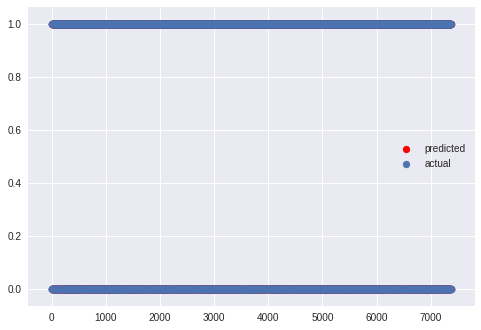

In [183]:
plt.scatter(x_axis,new_airline_data.sentiment[29488:],color='red',label='predicted')
plt.scatter(x_axis,y_predict,label='actual')
plt.legend()


# **Preprocessing the Reviews **

In [0]:
t=new_airline_data.copy()

In [0]:
pos_sentiment=[]
neg_sentiment=[]
avg_rating=[]
for i in airline_names:
  tempdf=t[t['airline_name']==i]
  pos=len(tempdf[tempdf['sentiment']==1])
  neg=len(tempdf)-pos
  pos_sentiment.append(pos)
  neg_sentiment.append(neg)
  avg_rate=tempdf.overall_rating.mean()
  avg_rating.append(avg_rate)
clustered_data=pd.DataFrame(list(zip(airline_names,avg_rating,pos_sentiment,neg_sentiment)),columns=['airline_name','average_rating','pos_sentiment','neg_sentiment'])

In [0]:
clustered_data=clustered_data.sort_values(by=['pos_sentiment','average_rating'],kind='mergesort',ascending=False)

In [171]:
clustered_data.head()

,airline_name,average_rating,pos_sentiment,neg_sentiment
97,british-airways,5.881696,511,385
215,lufthansa,6.993333,457,143
255,qantas-airways,7.005172,421,159
138,emirates,6.246377,418,272
257,qatar-airways,7.319106,377,115


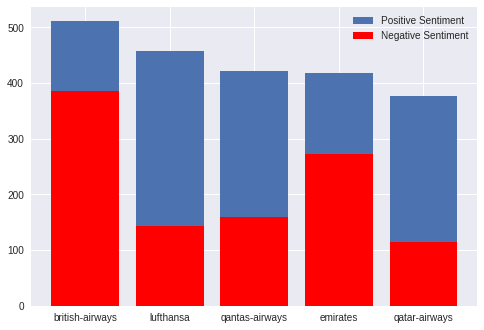

In [179]:
plt.bar(clustered_data.airline_name.head(5).values,clustered_data.pos_sentiment.head(5).values,label='Positive Sentiment')
plt.bar(clustered_data.airline_name.head(5).values,clustered_data.neg_sentiment.head(5).values,label='Negative Sentiment',color='red')
plt.legend()

# **Preprocessing Reviews and Removing Stop Words**


In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
import string
from nltk.tokenize import word_tokenize

In [0]:
stop = set(stopwords.words("english"))

In [0]:
def preprocessing(text):
  le = WordNetLemmatizer()
  words = word_tokenize(text)
  words = [x for x in words if not x in stop]
  words = [le.lemmatize(x) for x in words]
  return " ".join(words)

In [0]:
reviews2 = [preprocessing(x) for x in new_airline_data.content]

In [0]:
new_airline_data['reviews_processed']=reviews2

### **Logisitic Regression on Processed Data**

In [0]:
logic_model=LogisticRegression()
vectorizer_p=CountVectorizer(ngram_range=(1,2))
x_l_1=vectorizer_p.fit_transform(new_airline_data.reviews_processed.values)

In [221]:
logic_model.fit(x_l_1[:29488],new_airline_data.sentiment[:29488].values)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [222]:
logic_model.score(x_l_1[29488:],new_airline_data.sentiment[29488:].values)

0.8763054387630543

### **Implementing Linear SVM**

In [0]:
clf1 = LinearSVC(random_state=42, tol=1e-5)

In [224]:
clf1.fit(x_l_1[:29488],new_airline_data.sentiment[:29488])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=1e-05,
     verbose=0)

In [225]:
clf1.score(x_l_1[29488:],new_airline_data.sentiment[29488:])

0.8700664587006646